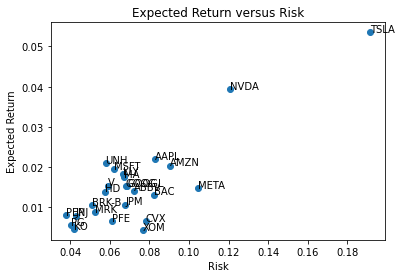

<Figure size 1440x720 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

stock_path = '../Resources/Individual Top 25 SP500 Stock Data'
df = pd.DataFrame()
for file in os.listdir(stock_path):
    # Derive the symbol from the filename
    symbol = file.split('.')[0]

    # Load the data
    path = os.path.join(stock_path, file)
    df_stock = pd.read_csv(path)

    # Set the Date as index column
    df_stock['date'] = pd.to_datetime(df_stock['date'])
    df_stock = df_stock.set_index('date')

    # Resample based on months and compute the changes
    resampled = df_stock.resample('BM')
    monthly = resampled.apply(lambda x: x[-1])
    df[symbol] = monthly['open'].pct_change()

# Drop NaNs
df = df.dropna()

# Make the plot
x = df.std().tolist()
y = df.mean().tolist()
symbols = df.columns

# Scatterplot and annotation
plt.scatter(x, y)
for index, symbol in enumerate(symbols):
    plt.annotate(symbol, (x[index], y[index]))

# Title and axis
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.title('Expected Return versus Risk')
plt.figure(figsize=(20,10))

# Save the plot
plt.savefig('expected_return_vs_risk.png')